In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = df.iloc[: , :-1]
y = df['Purchased']

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [10]:
x = pd.DataFrame(sc.transform(x) ,columns = x.columns)  # scaled values of x

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
xtrain ,xtest , ytrain ,ytest = train_test_split( x, y , test_size=0.2 , random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier()


In [30]:
dt.fit(xtrain , ytrain )


DecisionTreeClassifier()

In [31]:
dt1.fit(xtrain ,ytrain )

DecisionTreeClassifier(criterion='entropy')

In [17]:
dt.score(xtest ,ytest )*100

83.75

In [34]:
dt.score(xtrain ,ytrain )*100 
# You can observe that the accuracy while training is much more than testing 
# so that means our model is overfit
# Hence we will use pruning

99.6875

In [41]:
# we will conider the desicion tree till only certain depth
dt1 = DecisionTreeClassifier(max_depth=5)

In [42]:
dt1.fit(xtrain ,ytrain )

DecisionTreeClassifier(max_depth=5)

In [45]:
dt1.score(xtest ,ytest )*100 , dt1.score(xtrain ,ytrain )*100
# now you can observe that the model there is no overfit

# the above method was prepruning 
# you can also use post pruninig

(90.0, 93.4375)

In [60]:
# in postpruning we will run and check every time the best accuray
# we will train the model on allthis accuracies and checks the result
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain , ytrain)
    print(dt2.score(xtrain , ytrain) , dt2.score(xtest , ytest) , i)

# so you can see in the secnd , third , the differnce is too low hence the maxdepth should be 2or 3 for best fitting.
# our model is safe from overfitting
# hence we will choose the depth = 2 or 3 and train our model like earlier

0.821875 0.9 1
0.91875 0.9125 2
0.91875 0.9125 3
0.93125 0.9125 4
0.934375 0.9 5
0.95 0.8625 6
0.96875 0.85 7
0.975 0.85 8
0.98125 0.85 9
0.984375 0.85 10
0.990625 0.8375 11
0.990625 0.8375 12
0.99375 0.8375 13
0.996875 0.8375 14
0.996875 0.8375 15
0.996875 0.8375 16
0.996875 0.8375 17
0.996875 0.8375 18
0.996875 0.8375 19


In [18]:
from sklearn.tree import plot_tree

[]

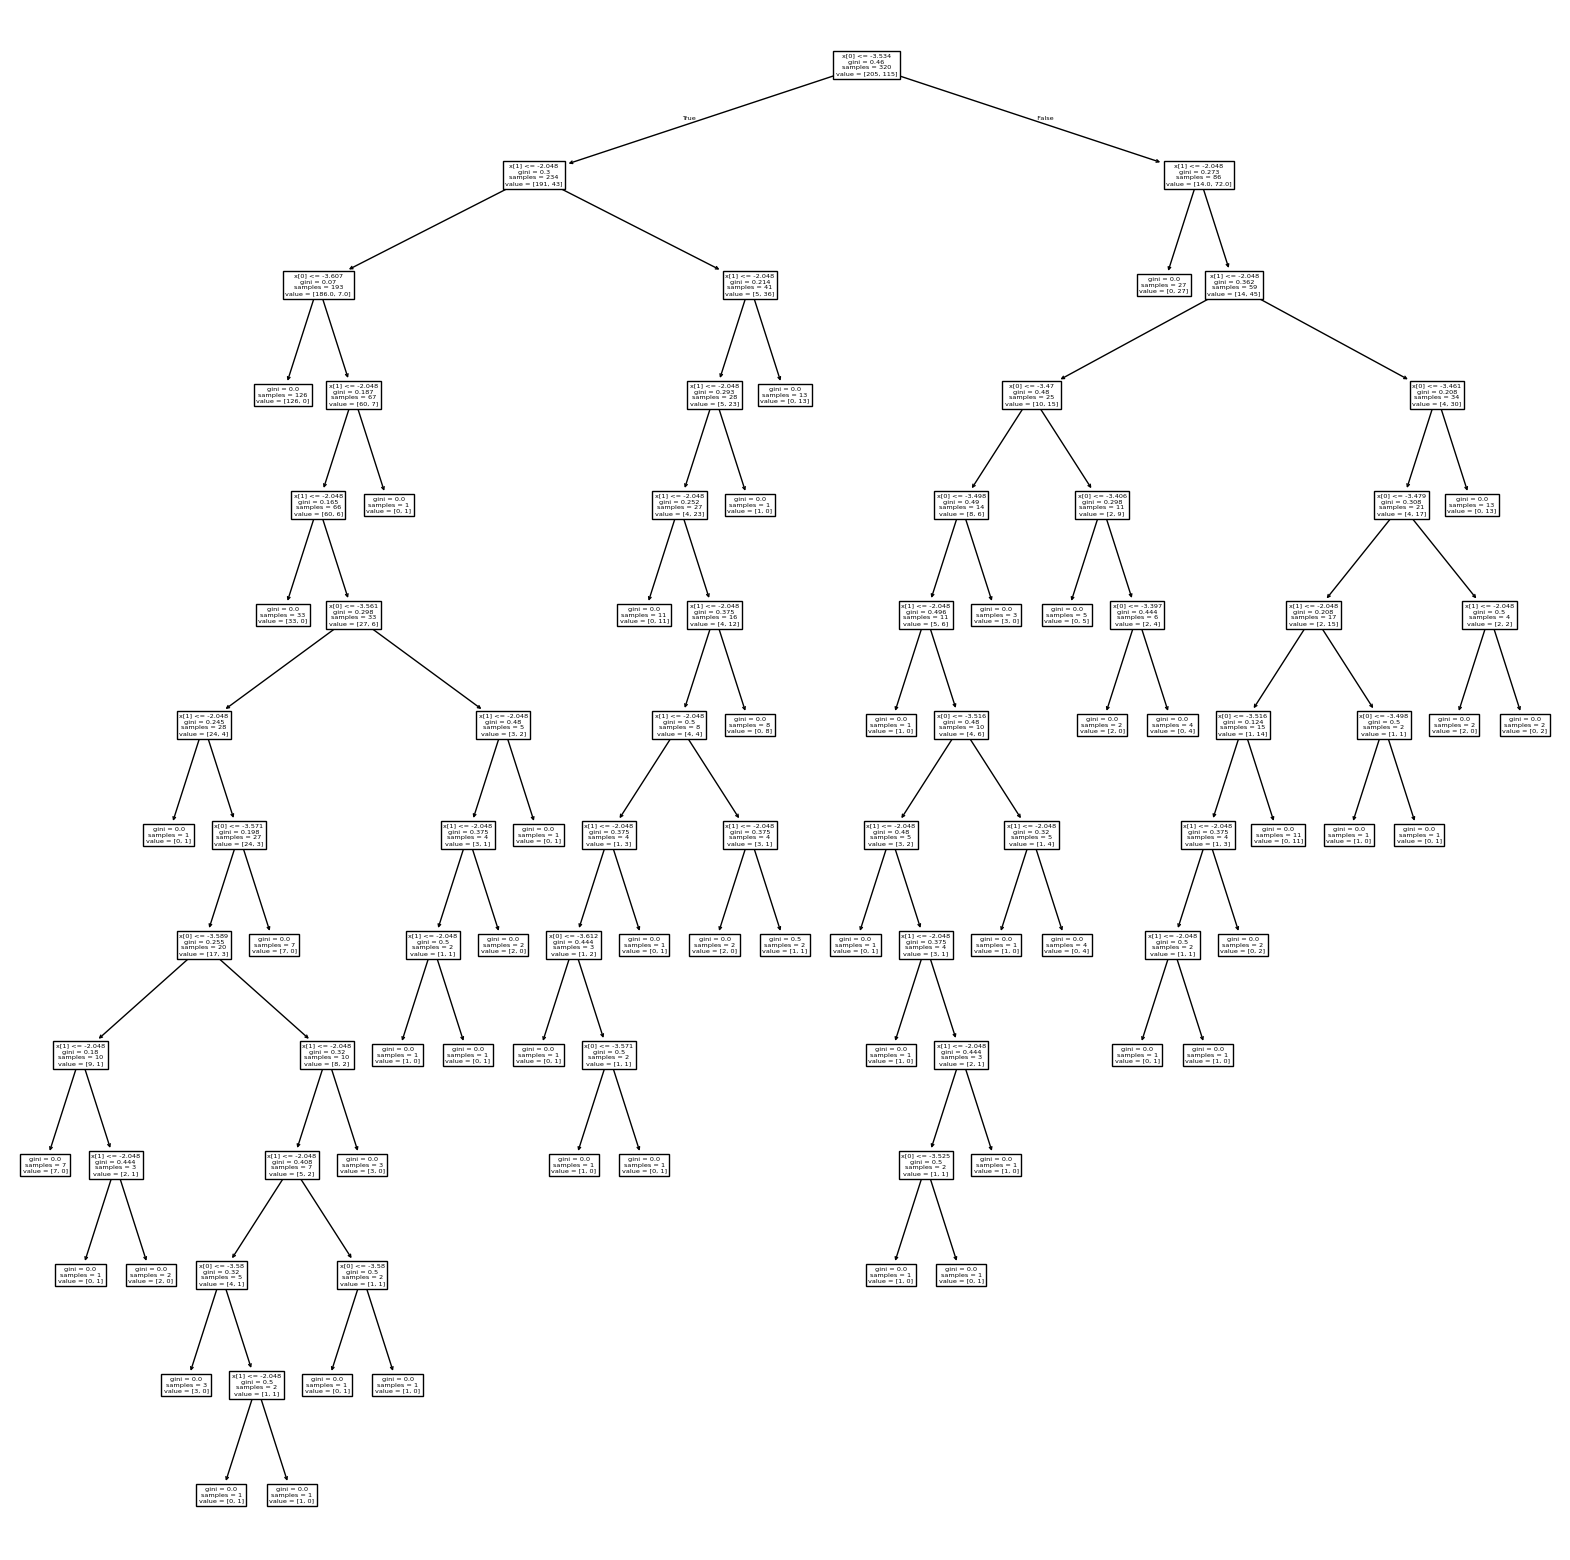

In [27]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.plot()